In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label) = mnist.load_data()

In [3]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

In [4]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [5]:
y_Train_OneHot=np_utils.to_categorical(y_train_label)
y_Test_OneHot=np_utils.to_categorical(y_test_label)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))

In [9]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
train_history = model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4381 - accuracy: 0.8829 - val_loss: 0.2183 - val_accuracy: 0.9409
Epoch 2/10
 - 1s - loss: 0.1910 - accuracy: 0.9454 - val_loss: 0.1554 - val_accuracy: 0.9559
Epoch 3/10
 - 1s - loss: 0.1355 - accuracy: 0.9617 - val_loss: 0.1259 - val_accuracy: 0.9650
Epoch 4/10
 - 1s - loss: 0.1026 - accuracy: 0.9701 - val_loss: 0.1117 - val_accuracy: 0.9680
Epoch 5/10
 - 1s - loss: 0.0811 - accuracy: 0.9772 - val_loss: 0.0985 - val_accuracy: 0.9717
Epoch 6/10
 - 1s - loss: 0.0660 - accuracy: 0.9818 - val_loss: 0.0934 - val_accuracy: 0.9726
Epoch 7/10
 - 1s - loss: 0.0544 - accuracy: 0.9852 - val_loss: 0.0912 - val_accuracy: 0.9738
Epoch 8/10
 - 1s - loss: 0.0459 - accuracy: 0.9876 - val_loss: 0.0834 - val_accuracy: 0.9756
Epoch 9/10
 - 1s - loss: 0.0379 - accuracy: 0.9903 - val_loss: 0.0822 - val_accuracy: 0.9756
Epoch 10/10
 - 1s - loss: 0.0316 - accuracy: 0.9918 - val_loss: 0.0804 - val_accuracy: 0.9763


In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoche')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
print(train_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


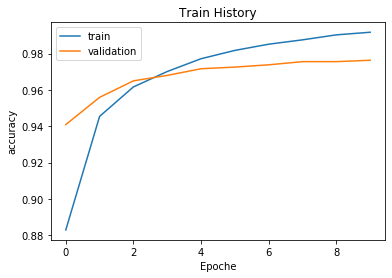

In [14]:
show_train_history(train_history,'accuracy','val_accuracy')

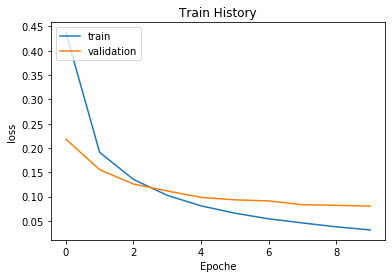

In [15]:
show_train_history(train_history,'loss','val_loss')

In [16]:
scores = model.evaluate(x_Test_normalize,y_Test_OneHot)
print("")
print('accuracy',scores[1])

10000/10000 [==============================] - 1s 73us/step

accuracy 0.9763000011444092


In [17]:
prediction=model.predict_classes(x_Test)

In [18]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25 : num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title="label="+str(labels[idx])
        if len(prediction)>0:
            title="label="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show() 

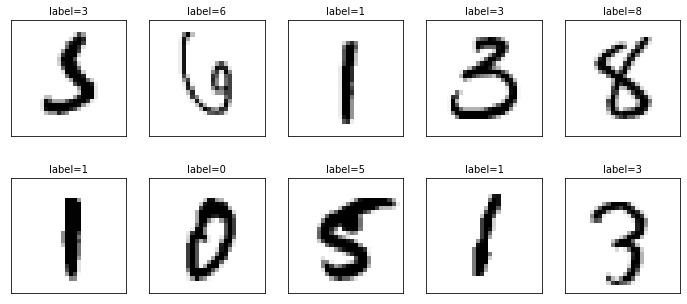

In [20]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [21]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['labels'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
labels,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1013,1,1,0,2,3,7,0
3,0,0,4,993,0,0,0,4,5,4
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,16,1,853,7,1,8,3
6,5,3,3,1,3,3,938,0,2,0
7,0,5,12,7,1,0,0,989,5,9
8,5,0,3,6,2,2,1,2,952,1


In [22]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:5]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [23]:
df[(df.label==5)&(df.predict==3)]


,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3


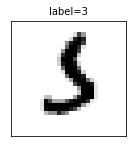

In [24]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)

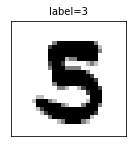

In [25]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=1003,num=1)